## Final Project Submission

Please fill out:
* Student name: Vinayak Modgil
* Student pace: self paced / part time / full time : full time
* Scheduled project review date/time: TBD
* Instructor name: James Irving
* Blog post URL:


## Table of Contents
- **[INTRODUCTION](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)<br>**
- **[SCRUB](#SCRUB)<br>**
- **[Explore](#Explore)<br>**
- **[Modeling](#Modeling)<br>**
- **[Interpret](#Interpret)<br>**

## INTRODUCTION

### Business Problem
Potential real estate tycoons are looking to purchase houses so that they can rent it out to future tenants. You are equipped with the data and you need to advise the stakeholders on the affect of different parameters that affect the value of houses in the King County.

## OBTAIN
Data Understanding:

Questions to consider:

- What are the business's pain points related to this project?
- How did you pick the data analysis question(s) that you did?
- Why are these questions important from a business perspective?

### Importing Libraries

In [2274]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import scipy.stats as stats
plt.style.use("seaborn")

### Importing Dataset

In [2275]:
df = pd.read_csv("data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## SCRUB

### Data Cleaning

In [2276]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [2277]:
from sklearn.impute import SimpleImputer
## Use imputer variable to clean features
imputer = SimpleImputer(missing_values = np.NaN, strategy="most_frequent")

In [2278]:
df["yr_renovated"] = imputer.fit_transform(df["yr_renovated"].values.reshape(-1, 1))[:, 0]
df["yr_renovated"].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [2279]:
df["view"] = imputer.fit_transform(df["view"].values.reshape(-1, 1))[:, 0]
df["view"].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [2280]:
df["waterfront"] = imputer.fit_transform(df["waterfront"].values.reshape(-1, 1))[:, 0]
df["waterfront"].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [2281]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [2282]:
df["sqft_basement"] = df["sqft_basement"].map(lambda x: x.replace("?", "0.0"))

### Feature Engineering

In [2283]:
df["large_home"] = df["bedrooms"] > 5
df["large_home"].value_counts()

False    21263
True       334
Name: large_home, dtype: int64

In [2284]:
latlong = df[["lat", "long"]]
latlong

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045
...,...,...
21592,47.6993,-122.346
21593,47.5107,-122.362
21594,47.5944,-122.299
21595,47.5345,-122.069


In [2285]:
df["how_old"] = abs(df["yr_built"] - 2015)

In [2286]:
df["renovated"] = df["yr_renovated"] != 0

In [2287]:
df["sqft_living_comparison"] = df["sqft_living"] > df["sqft_living15"]

In [2288]:
df["sqft_basement"] = df["sqft_basement"].astype("float64")
df["view"] = df["view"].astype("int64")
df["floors"] = df["floors"].astype("int64")
df["waterfront"] = df["waterfront"].astype("int64")
df["renovated"] = df["renovated"].astype("int64")
df["large_home"] = df["large_home"].astype("int64")
df["sqft_living_comparison"] = df["sqft_living_comparison"].astype("int64")

In [2289]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,large_home,how_old,renovated,sqft_living_comparison
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1,0,0,...,0.0,98178,47.5112,-122.257,1340,5650,0,60,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2,0,0,...,1991.0,98125,47.7210,-122.319,1690,7639,0,64,1,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1,0,0,...,0.0,98028,47.7379,-122.233,2720,8062,0,82,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1,0,0,...,0.0,98136,47.5208,-122.393,1360,5000,0,50,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1,0,0,...,0.0,98074,47.6168,-122.045,1800,7503,0,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3,0,0,...,0.0,98103,47.6993,-122.346,1530,1509,0,6,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2,0,0,...,0.0,98146,47.5107,-122.362,1830,7200,0,1,0,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2,0,0,...,0.0,98144,47.5944,-122.299,1020,2007,0,6,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2,0,0,...,0.0,98027,47.5345,-122.069,1410,1287,0,11,0,1


### Plotting relationships between dependent and independent variable

In [2290]:
def histogram(column):
    '''
    returns histogram of a column
    in the dataframe df
    '''
    hist = df[column].hist()
    return plt.show()

def reg(column, df = df):
    return sns.regplot(x=column, y="price", data=df)

#### Bedroom

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

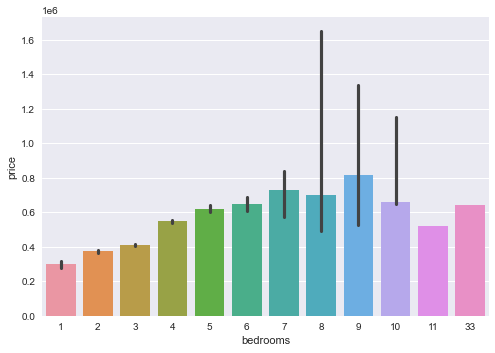

In [2291]:
sns.barplot(data=df, x="bedrooms", y="price", ci=95, estimator=np.median)

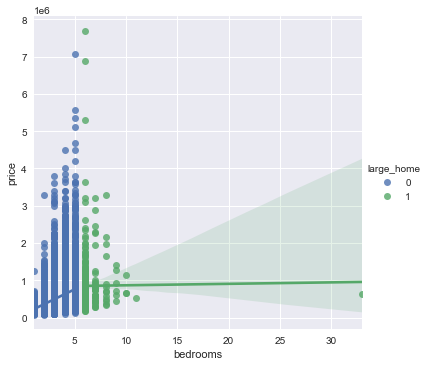

In [2292]:
sns.lmplot(x="bedrooms", y="price", hue="large_home", data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

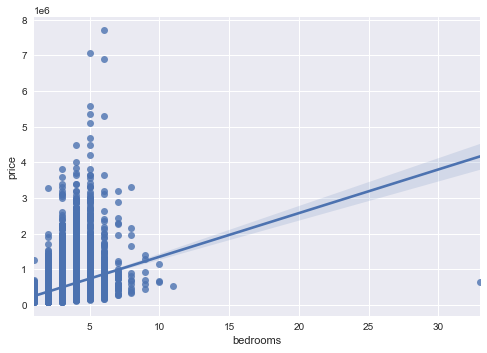

In [2293]:
reg("bedrooms", df)

In [2294]:
def find_outliers(data):
    """
     Detects outliers using the 1.5*IQR thresholds.
    Returns a boolean Series where True=outlier
    
    """ 
    stats = data.describe()
    q1 = stats["25%"]
    q3 = stats["75%"]
    thresh = 1.5*(q3 - q1)
    idx_outliers = (data < (q1-thresh)) | (data > (q3+thresh))
    return idx_outliers

outliers_bedrooms = find_outliers(df["bedrooms"])

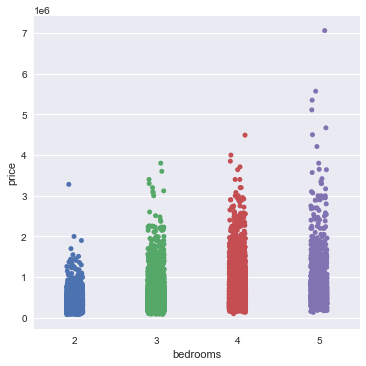

In [2295]:
sns.catplot(data=df[~outliers_bedrooms], x="bedrooms", y="price")

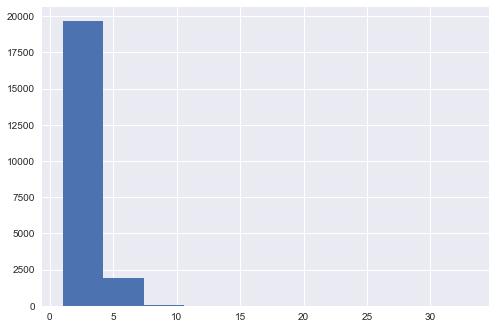

In [2296]:
histogram("bedrooms")

#### Bathroom

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

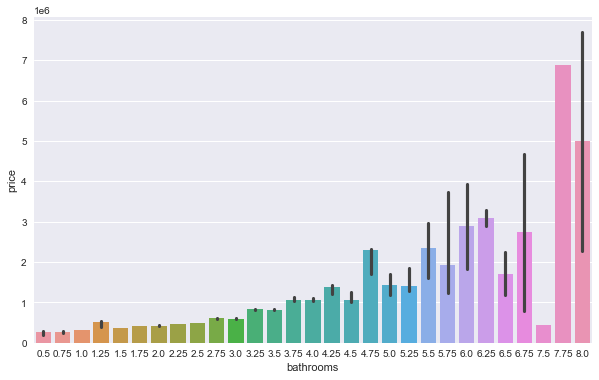

In [2297]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="bathrooms", y="price", data=df, ci=68, estimator=np.median, ax=ax)

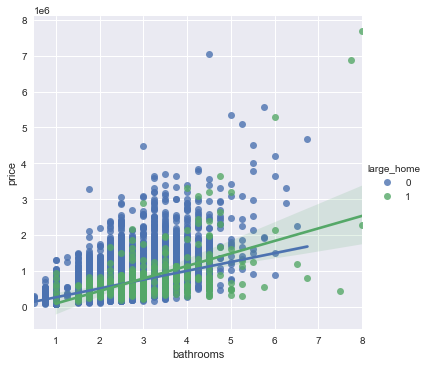

In [2298]:
sns.lmplot(x="bathrooms", y="price", data=df, hue="large_home")

In [2299]:
outliers_bathroom = find_outliers(df["bathrooms"])
outliers_bathroom.value_counts()

False    21036
True       561
Name: bathrooms, dtype: int64

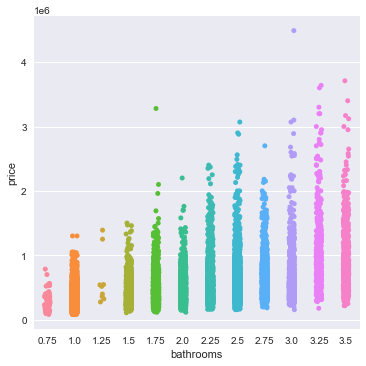

In [2300]:
sns.catplot(data=df[~outliers_bathroom], x="bathrooms", y="price")

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

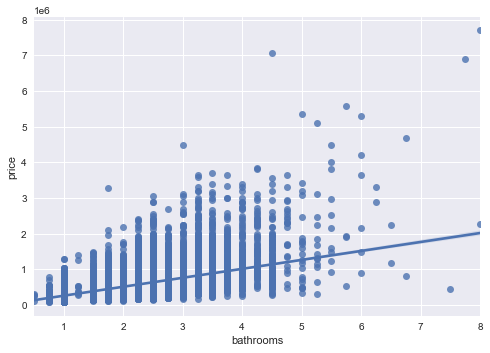

In [2301]:
reg("bathrooms")

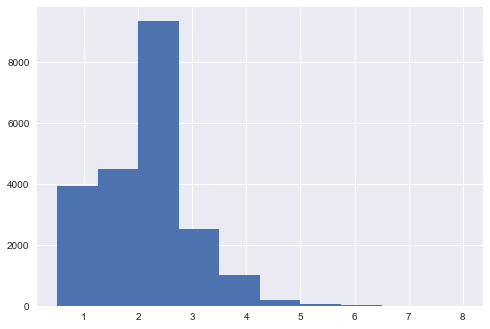

In [2302]:
histogram("bathrooms")

#### SQFT - living

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

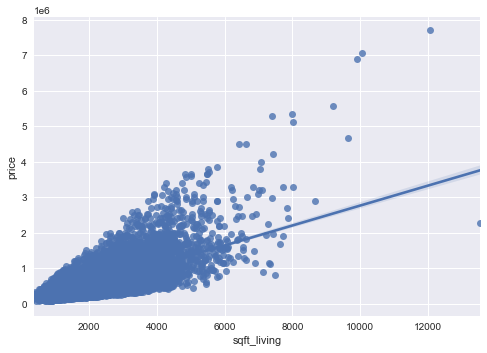

In [2303]:
reg("sqft_living")

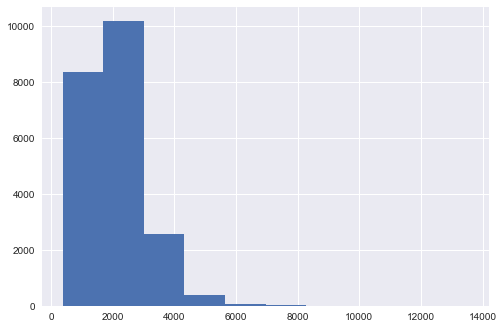

In [2304]:
histogram("sqft_living")

#### SQFT-lot

In [2305]:
def thousands(x, pos):
    return "{:1.1f}K".format(x* 1e-4)

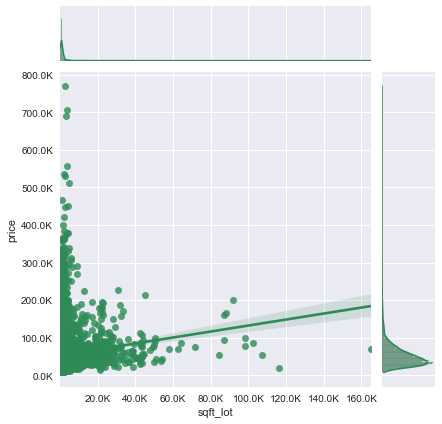

In [2306]:
fig3 = sns.jointplot(x="sqft_lot", y="price", data=df, kind="reg", color="seagreen")
fig3.ax_joint.yaxis.set_major_formatter(FuncFormatter(thousands))
fig3.ax_joint.xaxis.set_major_formatter(FuncFormatter(thousands))

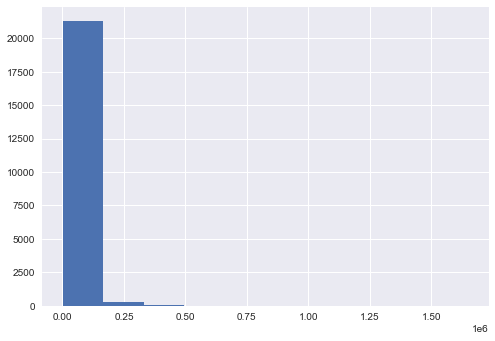

In [2307]:
histogram("sqft_lot")

#### Floors

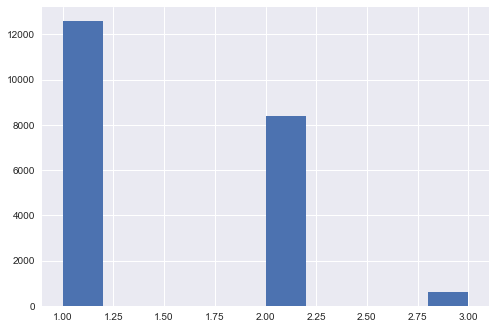

In [2308]:
histogram("floors")

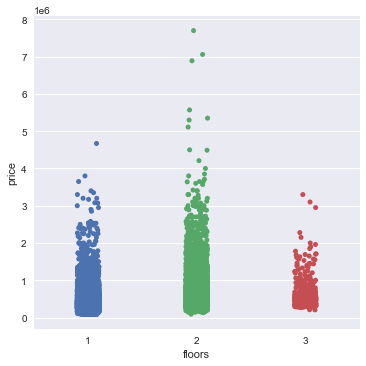

In [2309]:
sns.catplot(x="floors", y="price", data=df)

#### Waterfront

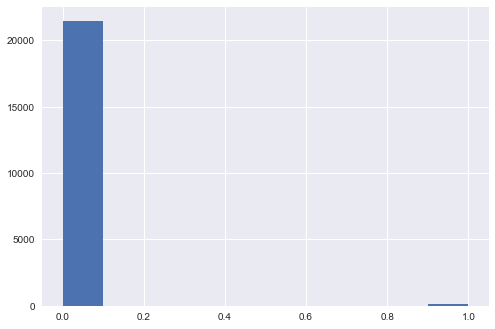

In [2310]:
histogram("waterfront")

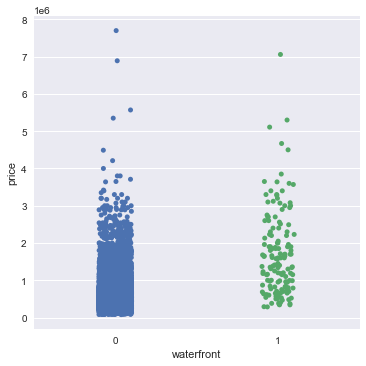

In [2311]:
sns.catplot(x="waterfront", y="price", data=df)

#### Grade

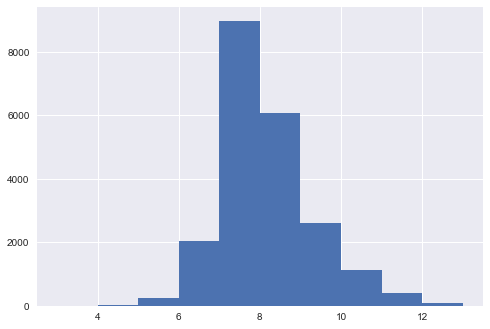

In [2312]:
histogram("grade")

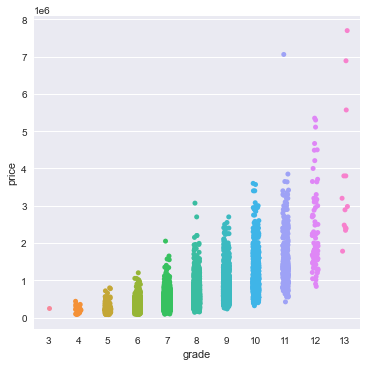

In [2313]:
sns.catplot(x="grade", y="price", data=df)

<AxesSubplot:xlabel='grade', ylabel='price'>

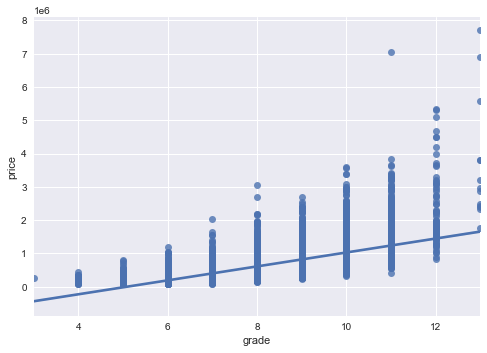

In [2314]:
reg("grade")

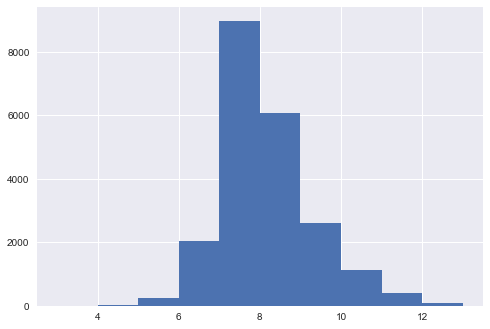

In [2315]:
histogram("grade")

#### View

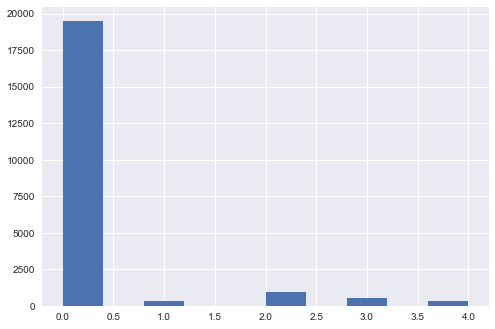

In [2316]:
histogram("view")

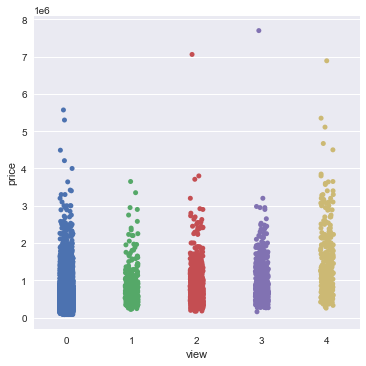

In [2317]:
sns.catplot(x="view", y="price", data=df)

<AxesSubplot:xlabel='view', ylabel='price'>

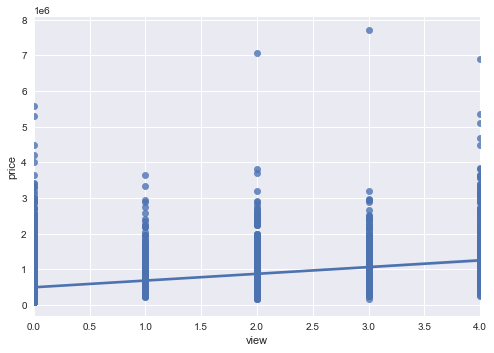

In [2318]:
reg("view")

#### SQFT above

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

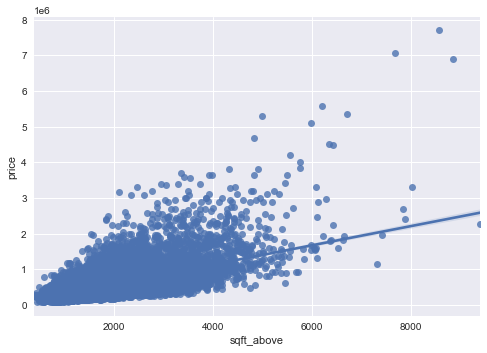

In [2319]:
reg("sqft_above")

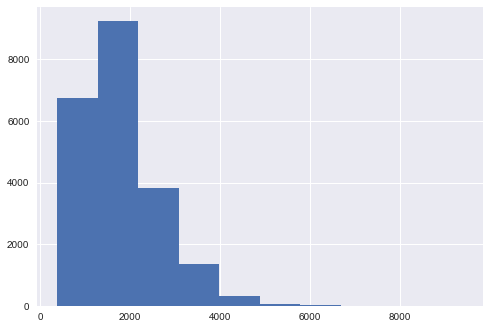

In [2320]:
histogram("sqft_above")

#### SQFT-living15

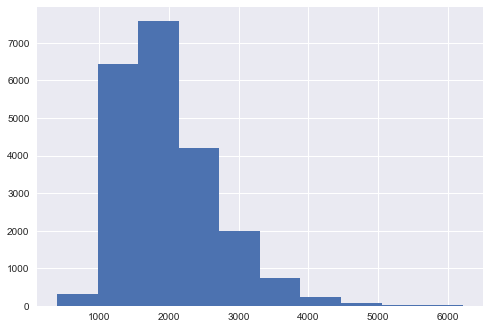

In [2321]:
histogram("sqft_living15")

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

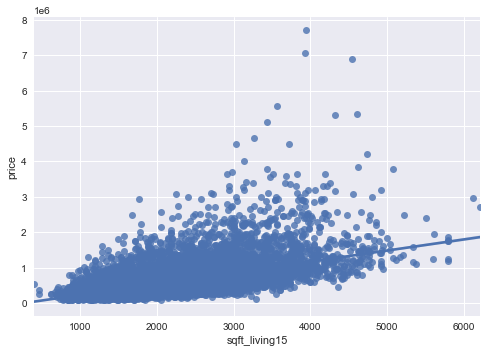

In [2322]:
reg("sqft_living15")

#### SQFT_lot15

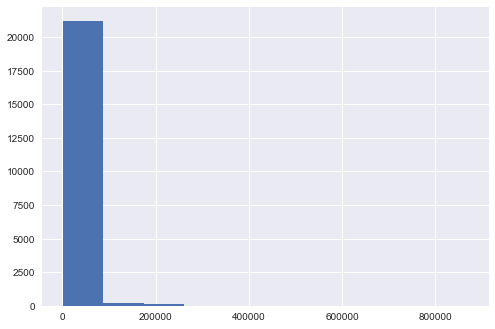

In [2323]:
histogram("sqft_lot15")

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

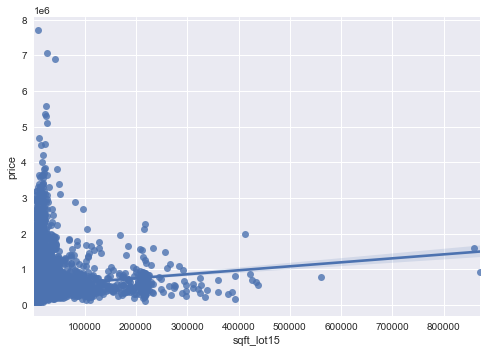

In [2324]:
reg("sqft_lot15")

#### SQFT_basement

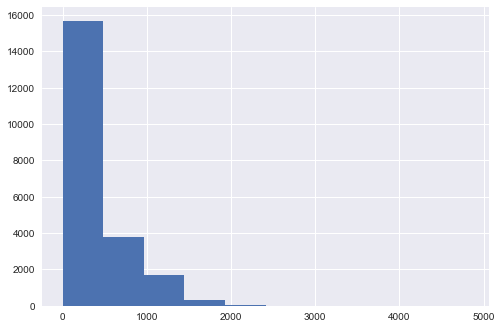

In [2325]:
histogram("sqft_basement")

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

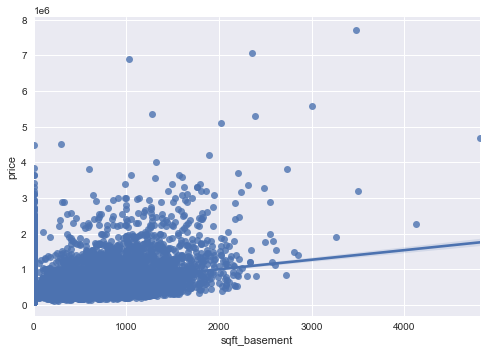

In [2326]:
reg("sqft_basement")

### Shifting dependent variable to the end

In [2327]:
def move_price_col(df):
    '''
    takes the dataframe as a parameter
    -------------------
    returns the updated dataframe with
    dependent variable in the end
    '''
    # store values of all the columns in cols
    cols = list(df.columns.values)
    
    # pop the price index from cols
    cols.pop(cols.index("price"))
    
    # add the price column to the dataframe df
    df = df[cols + ["price"]]
    return df

df = move_price_col(df)
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,large_home,how_old,renovated,sqft_living_comparison,price
0,7129300520,10/13/2014,3,1.00,1180,5650,1,0,0,3,...,98178,47.5112,-122.257,1340,5650,0,60,0,0,221900.0
1,6414100192,12/9/2014,3,2.25,2570,7242,2,0,0,3,...,98125,47.7210,-122.319,1690,7639,0,64,1,1,538000.0
2,5631500400,2/25/2015,2,1.00,770,10000,1,0,0,3,...,98028,47.7379,-122.233,2720,8062,0,82,0,0,180000.0
3,2487200875,12/9/2014,4,3.00,1960,5000,1,0,0,5,...,98136,47.5208,-122.393,1360,5000,0,50,0,1,604000.0
4,1954400510,2/18/2015,3,2.00,1680,8080,1,0,0,3,...,98074,47.6168,-122.045,1800,7503,0,28,0,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1530,1131,3,0,0,3,...,98103,47.6993,-122.346,1530,1509,0,6,0,0,360000.0
21593,6600060120,2/23/2015,4,2.50,2310,5813,2,0,0,3,...,98146,47.5107,-122.362,1830,7200,0,1,0,1,400000.0
21594,1523300141,6/23/2014,2,0.75,1020,1350,2,0,0,3,...,98144,47.5944,-122.299,1020,2007,0,6,0,0,402101.0
21595,291310100,1/16/2015,3,2.50,1600,2388,2,0,0,3,...,98027,47.5345,-122.069,1410,1287,0,11,0,1,400000.0


## Explore

In [2328]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [2329]:
df["view"].value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

In [2330]:
df["floors"].value_counts()

1    12583
2     8396
3      618
Name: floors, dtype: int64

In [2331]:
df["condition"].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [2332]:
categorical = ["zipcode"]

#### Taking care of numeric data

In [2333]:
def standardize(feature):
    '''
    takes a feature in the df as the parameter
    ------------------------------------
    returns the standardized value of the feature
    '''
    return (feature - feature.mean()) / feature.std()

In [2334]:
#df_stdized = df[numeric].apply(standardize)
#df_stdized

#### Taking care of categorical data

In [2335]:
df[categorical]

,zipcode
0,98178
1,98125
2,98028
3,98136
4,98074
...,...
21592,98103
21593,98146
21594,98144
21595,98027


In [2336]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop="first")
arr = ohe.fit_transform(df[categorical])
cat_df = pd.DataFrame(arr, columns= ohe.get_feature_names(categorical))
cat_df

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2337]:
modeling_df = pd.concat([df.drop(categorical, axis=1), cat_df], axis=1)

In [2338]:
modeling_df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,10/13/2014,3,1.00,1180,5650,1,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6414100192,12/9/2014,3,2.25,2570,7242,2,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,2,1.00,770,10000,1,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,4,3.00,1960,5000,1,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2/18/2015,3,2.00,1680,8080,1,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1530,1131,3,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,6600060120,2/23/2015,4,2.50,2310,5813,2,0,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,1523300141,6/23/2014,2,0.75,1020,1350,2,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,291310100,1/16/2015,3,2.50,1600,2388,2,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2339]:
modeling_df.to_csv("kc_cleaned.csv", index=False)

#### Initial Model before Multicollinearity check

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:00:11   Log-Likelihood:            -2.8913e+05
No. Observations:               21597   AIC:                         5.792e+05
Df Residuals:                   21136   BIC:                         5.829e+05
Df Model:                         460                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -30.5778     29.894     -1.023      0.306     -89.172      28.016
date[T.1/12/2015]       4.116e+04   1.61e+05      0.255      0.799   -2.75e+05    3.58e+05
date[T.1/13/2015]       4.822e+04   1.61e+05      0.299      0.765   -2.68e+05    3.65e+05
date[T.1/14/2015]       1.665e+04   1.61e+05      0.103      0.918   -2.99e+05    3.33e+05
date[T.1/15/2015]       2.532e+04   1.61e+05      0.157      0.875   -2.91e+05    3.42e+05
date[T.1/16/2015]      -8655.2406   1.61e+05     -0.054      0.957   -3.24e+05    3.07e+05
date[T.1/17/2015]       9.885e+04   2.26e+05      0.438      0.661   -3.44e+05    5.41e+05
date[T.1/19/2015]      -4.039e+04   1.69e+05     -0.239      0.811   -3.72e+05    2.92e+05
date[T.1/2/2015]        5.385e+04   1.61e+05      0.334      0.739   -2.62e+05     3.7e+05
date[T.1/20/2015]       5.397e+04   1.61e+05      0.335      0.738   -2.62e+05     3.7e+05
date[T.1/21/2015]       4.923e+04   1.61e+05      0.306      0.760   -2.66e+05    3.65e+05
date[T.1/22/2015]        2.81e+04   1.61e+05      0.174      0.862   -2.88e+05    3.44e+05
date[T.1/23/2015]       1.834e+04   1.61e+05      0.114      0.909   -2.98e+05    3.34e+05
date[T.1/24/2015]      -1.405e+05   1.78e+05     -0.787      0.431    -4.9e+05    2.09e+05
date[T.1/25/2015]       9032.3028   1.84e+05      0.049      0.961   -3.52e+05     3.7e+05
date[T.1/26/2015]      -5359.3184   1.61e+05     -0.033      0.973   -3.21e+05    3.11e+05
date[T.1/27/2015]       5.389e+04   1.61e+05      0.335      0.738   -2.62e+05    3.69e+05
date[T.1/28/2015]       2.692e+04   1.61e+05      0.167      0.867   -2.88e+05    3.42e+05
date[T.1/29/2015]       5.341e+04   1.61e+05      0.331      0.741   -2.63e+05     3.7e+05
date[T.1/30/2015]       8.208e+04   1.62e+05      0.507      0.612   -2.35e+05    3.99e+05
date[T.1/31/2015]      -8.161e+04   2.26e+05     -0.361      0.718   -5.24e+05    3.61e+05
date[T.1/5/2015]        4.497e+04   1.61e+05      0.279      0.780    -2.7e+05     3.6e+05
date[T.1/6/2015]        4.876e+04   1.61e+05      0.302      0.763   -2.68e+05    3.65e+05
date[T.1/7/2015]        5.173e+04   1.61e+05      0.321      0.748   -2.64e+05    3.67e+05
date[T.1/8/2015]        9005.7246   1.61e+05      0.056      0.955   -3.07e+05    3.25e+05
date[T.1/9/2015]        8.913e+04   1.62e+05      0.551      0.582   -2.28e+05    4.06e+05
date[T.10/1/2014]       4.313e+04   1.61e+05      0.269      0.788   -2.71e+05    3.58e+05
date[T.10/10/2014]      2.649e+04   1.61e+05      0.165      0.869   -2.88e+05    3.41e+05
date[T.10/11/2014]      5.971e+05   1.96e+05      3.049      0.002    2.13e+05    9.81e+05
date[T.10/12/2014]      5.077e+04   1.84e+05      0.275      0.783   -3.11e+05    4.12e+05
date[T.10/13/2014]      7.634e+04   1.61e+05      0.475      0.635   -2.39e+05  

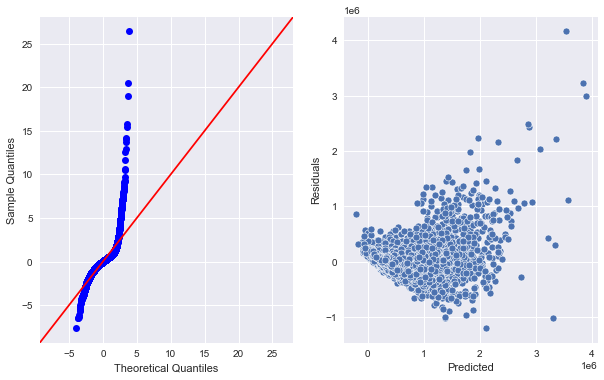

In [2340]:
def modeling(df, target="price"):
    features = " + ".join(df.drop(target, axis=1).columns)
    f = target + "~" + features
    model = smf.ols(formula = f, data=df).fit()
    display(model.summary())
    
    fig, ax = plt.subplots(ncols=2, figsize=(10, 6))
    sm.graphics.qqplot(model.resid, line="45", fit=True, ax=ax[0])
    sns.scatterplot(x=model.predict(df, transform=True), y=model.resid, ax=ax[1])
    ax[1].set_ylabel('Residuals')
    ax[1].set_xlabel('Predicted')
    return model

initial_model = modeling(modeling_df)
    

#### Multicollinearity check

In [2341]:
df.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,large_home,how_old,renovated,sqft_living_comparison,price
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.019229,-0.003599,0.011772,-0.023803,0.008188,...,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.009057,-0.021617,-0.010621,-0.004408,-0.016772
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.158065,-0.002127,0.078354,0.026496,0.356563,...,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.406468,-0.155670,0.017635,0.365105,0.308787
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.520922,0.063629,0.186016,-0.126479,0.665838,...,-0.204786,0.024280,0.224903,0.569884,0.088303,0.172900,-0.507173,0.046742,0.342441,0.525906
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353372,0.104637,0.281715,-0.059445,0.762779,...,-0.199802,0.052155,0.241214,0.756402,0.184342,0.178745,-0.318152,0.050829,0.470834,0.701917
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.008603,0.021459,0.075054,-0.008830,0.114731,...,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.008984,-0.052946,0.005091,0.047754,0.089876
floors,0.019229,0.158065,0.520922,0.353372,-0.008603,1.000000,0.018321,0.023711,-0.293463,0.473273,...,-0.097146,0.029218,0.159481,0.296797,-0.012766,0.023155,-0.578549,-0.009580,0.109445,0.237264
waterfront,-0.003599,-0.002127,0.063629,0.104637,0.021459,0.018321,1.000000,0.380543,0.016648,0.082818,...,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.007978,0.024487,0.074267,0.022118,0.264306
view,0.011772,0.078354,0.186016,0.281715,0.075054,0.023711,0.380543,1.000000,0.045622,0.249082,...,0.085059,0.006321,-0.077702,0.278928,0.073083,0.044224,0.054452,0.090480,0.062615,0.393497
condition,-0.023803,0.026496,-0.126479,-0.059445,-0.008830,-0.293463,0.016648,0.045622,1.000000,-0.146896,...,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.011028,0.361592,-0.055383,0.056044,0.036056
grade,0.008188,0.356563,0.665838,0.762779,0.114731,0.473273,0.082818,0.249082,-0.146896,1.000000,...,-0.185771,0.113575,0.200341,0.713867,0.120981,0.048060,-0.447865,0.015259,0.213058,0.667951


In [2342]:
abs(df.corr()) > 0.75

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,large_home,how_old,renovated,sqft_living_comparison,price
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


(<Figure size 1080x720 with 2 Axes>, <AxesSubplot:>)

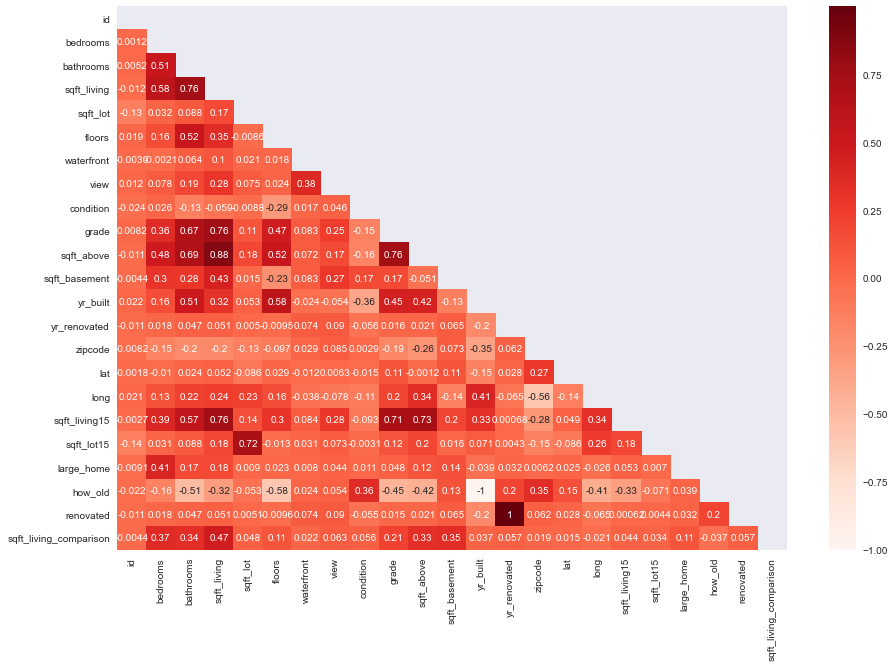

In [2343]:
def heatmap(df, figsize=(15, 10), cmap="Reds"):
    corr = df.drop("price", axis=1).corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr, annot=True,cmap=cmap, mask=mask)
    return fig, ax

heatmap(df)

In [2344]:
## Making a dataframe with all the non-duplicate correlation coefficient
df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr["pairs"] = list(zip(df_corr["level_0"], df_corr["level_1"]))

## Setting index to the new column "pairs" created
df_corr.set_index(["pairs"], inplace=True)

## Dropping the columns "level_1" and "level_0"
df_corr.drop(columns=["level_1", "level_0"], inplace=True)

df_corr.columns = ["cc"]

df_corr[(df_corr["cc"] > 0.75) & (df_corr["cc"] < 1)]


,cc
pairs,
"(renovated, yr_renovated)",0.999968
"(yr_renovated, renovated)",0.999968
"(sqft_living, sqft_above)",0.876448
"(sqft_above, sqft_living)",0.876448
"(sqft_living, grade)",0.762779
"(grade, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_living15, sqft_living)",0.756402
"(grade, sqft_above)",0.756073


As we can see yr_renovated, sqft_above and sqft_living are highly correlated, we shall drop these columns from our main dataframe to avoid modeling issues

In [2345]:
modeling_df.drop(["yr_renovated", "sqft_living", "sqft_above"], axis=1, inplace=True)

In [2346]:
modeling_df

,id,date,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,10/13/2014,3,1.00,5650,1,0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6414100192,12/9/2014,3,2.25,7242,2,0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,2,1.00,10000,1,0,0,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,4,3.00,5000,1,0,0,5,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2/18/2015,3,2.00,8080,1,0,0,3,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1131,3,0,0,3,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,6600060120,2/23/2015,4,2.50,5813,2,0,0,3,8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,1523300141,6/23/2014,2,0.75,1350,2,0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,291310100,1/16/2015,3,2.50,2388,2,0,0,3,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

### Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [2347]:
modeling_df.drop(["id", "date"], axis=1, inplace=True)
modeling_df

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,5650,1,0,0,3,7,0.0,1955,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,7242,2,0,0,3,7,400.0,1951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,10000,1,0,0,3,6,0.0,1933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,5000,1,0,0,5,7,910.0,1965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,8080,1,0,0,3,8,0.0,1987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,3,0,0,3,8,0.0,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,4,2.50,5813,2,0,0,3,8,0.0,2014,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,2,0.75,1350,2,0,0,3,7,0.0,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,3,2.50,2388,2,0,0,3,8,0.0,2004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     830.7
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:00:15   Log-Likelihood:            -2.9159e+05
No. Observations:               21597   AIC:                         5.833e+05
Df Residuals:                   21510   BIC:                         5.840e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -6.8519      3.332     -2.056      0.040     -13.384      -0.320
bedrooms               -4540.6348   1791.429     -2.535      0.011   -8051.968   -1029.301
bathrooms               7.745e+04   2760.224     28.060      0.000     7.2e+04    8.29e+04
sqft_lot                   0.3830      0.042      9.061      0.000       0.300       0.466
floors                     -1e+04   3451.011     -2.898      0.004   -1.68e+04   -3238.007
waterfront              7.213e+05   1.62e+04     44.536      0.000     6.9e+05    7.53e+05
view                    5.537e+04   1917.688     28.872      0.000    5.16e+04    5.91e+04
condition               2.091e+04   2117.684      9.875      0.000    1.68e+04    2.51e+04
grade                   1.067e+05   1846.844     57.771      0.000    1.03e+05     1.1e+05
sqft_basement             14.3830      3.647      3.944      0.000       7.235      21.531
yr_built               -7652.1221   3356.452     -2.280      0.023   -1.42e+04   -1073.228
lat                     1.884e+05   6.99e+04      2.696      0.007    5.14e+04    3.25e+05
long                   -4.539e+04   5.02e+04     -0.904      0.366   -1.44e+05     5.3e+04
sqft_living15             96.2818      3.093     31.124      0.000      90.218     102.345
sqft_lot15                 0.0155      0.067      0.232      0.816      -0.115       0.146
large_home               4.52e+04   1.09e+04      4.136      0.000    2.38e+04    6.66e+04
how_old                -6154.5417   3358.866     -1.832      0.067   -1.27e+04     429.085
renovated               3.062e+04   7045.060      4.346      0.000    1.68e+04    4.44e+04
sqft_living_comparison  4.609e+04   2923.666     15.766      0.000    4.04e+04    5.18e+04
zipcode_98002           4.281e+04    1.6e+04      2.684      0.007    1.15e+04    7.41e+04
zipcode_98003          -3.516e+04   1.43e+04     -2.466      0.014   -6.31e+04   -7216.881
zipcode_98004           7.149e+05   2.59e+04     27.590      0.000    6.64e+05    7.66e+05
zipcode_98005           2.148e+05   2.77e+04      7.760      0.000    1.61e+05    2.69e+05
zipcode_98006           1.931e+05   2.26e+04      8.529      0.000    1.49e+05    2.37e+05
zipcode_98007           1.528e+05   2.86e+04      5.349      0.000    9.68e+04    2.09e+05
zipcode_98008           1.748e+05   2.71e+04      6.442      0.000    1.22e+05    2.28e+05
zipcode_98010           9.276e+04   2.43e+04      3.815      0.000    4.51e+04     1.4e+05
zipcode_98011           2.536e+04   3.53e+04      0.718      0.473   -4.38e+04    9.46e+04
zipcode_98014           6.464e+04   3.88e+04      1.666      0.096   -1.14e+04    1.41e+05
zipcode_98019           2.573e+04   3.83e+04      0.672      0.501   -4.93e+04    1.01e+05
zipcode_98022           1.198e+04   2.11e+04      0.567      0.571   -2.94e+04  

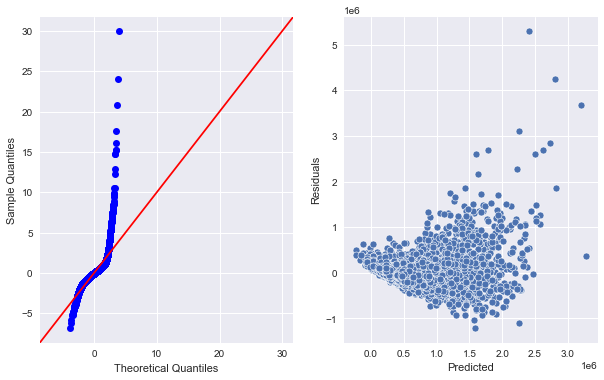

In [2348]:
modeling(modeling_df)

The p-value of long, sqft_lot and how_old is greater than our 0.05 alpha level. So we shall drop these columns as they are statistically insignificant.

In [2349]:
drop_cols = ["long", "sqft_lot15", "how_old"]
modeling_df.drop(drop_cols, axis=1, inplace=True)
modeling_df

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,5650,1,0,0,3,7,0.0,1955,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,7242,2,0,0,3,7,400.0,1951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,10000,1,0,0,3,6,0.0,1933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,5000,1,0,0,5,7,910.0,1965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,8080,1,0,0,3,8,0.0,1987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,3,0,0,3,8,0.0,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,4,2.50,5813,2,0,0,3,8,0.0,2014,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,2,0.75,1350,2,0,0,3,7,0.0,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,3,2.50,2388,2,0,0,3,8,0.0,2004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     850.5
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:00:16   Log-Likelihood:            -2.9159e+05
No. Observations:               21597   AIC:                         5.833e+05
Df Residuals:                   21512   BIC:                         5.840e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -7.057e+06    3.3e+06     -2.138      0.033   -1.35e+07   -5.88e+05
bedrooms               -4543.4383   1790.602     -2.537      0.011   -8053.151   -1033.726
bathrooms               7.743e+04   2760.024     28.056      0.000     7.2e+04    8.28e+04
sqft_lot                   0.3873      0.032     12.129      0.000       0.325       0.450
floors                 -9918.0145   3447.737     -2.877      0.004   -1.67e+04   -3160.193
waterfront              7.216e+05   1.62e+04     44.570      0.000     6.9e+05    7.53e+05
view                    5.539e+04   1917.510     28.884      0.000    5.16e+04    5.91e+04
condition               2.092e+04   2117.462      9.880      0.000    1.68e+04    2.51e+04
grade                   1.067e+05   1846.648     57.787      0.000    1.03e+05     1.1e+05
sqft_basement             14.4688      3.645      3.969      0.000       7.324      21.614
yr_built               -1499.5038     72.454    -20.696      0.000   -1641.520   -1357.488
lat                     1.928e+05   6.97e+04      2.766      0.006    5.62e+04    3.29e+05
sqft_living15             96.3014      3.082     31.242      0.000      90.260     102.343
large_home              4.517e+04   1.09e+04      4.134      0.000    2.38e+04    6.66e+04
renovated               3.054e+04   7044.113      4.335      0.000    1.67e+04    4.43e+04
sqft_living_comparison  4.605e+04   2922.992     15.756      0.000    4.03e+04    5.18e+04
zipcode_98002           4.019e+04   1.57e+04      2.563      0.010    9449.768    7.09e+04
zipcode_98003          -3.343e+04   1.41e+04     -2.366      0.018   -6.11e+04   -5735.730
zipcode_98004           7.105e+05   2.55e+04     27.913      0.000    6.61e+05     7.6e+05
zipcode_98005           2.088e+05   2.69e+04      7.773      0.000    1.56e+05    2.61e+05
zipcode_98006           1.863e+05   2.14e+04      8.721      0.000    1.44e+05    2.28e+05
zipcode_98007           1.456e+05   2.74e+04      5.308      0.000    9.19e+04    1.99e+05
zipcode_98008           1.664e+05   2.55e+04      6.529      0.000    1.16e+05    2.16e+05
zipcode_98010           8.074e+04   2.01e+04      4.007      0.000    4.12e+04     1.2e+05
zipcode_98011            2.02e+04   3.48e+04      0.580      0.562   -4.81e+04    8.85e+04
zipcode_98014           4.456e+04   3.14e+04      1.418      0.156    -1.7e+04    1.06e+05
zipcode_98019           9792.5893   3.38e+04      0.289      0.772   -5.65e+04    7.61e+04
zipcode_98022            282.6343   1.65e+04      0.017      0.986   -3.21e+04    3.26e+04
zipcode_98023          -4.876e+04   1.23e+04     -3.979      0.000   -7.28e+04   -2.47e+04
zipcode_98024           1.239e+05   2.81e+04      4.404      0.000    6.87e+04    1.79e+05
zipcode_98027           1.054e+05   1.96e+04      5.374      0.000     6.7e+04  

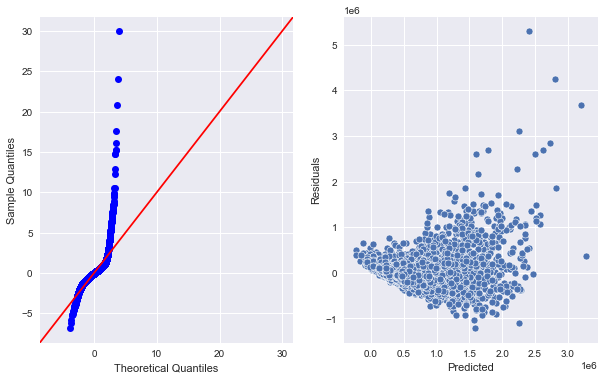

In [2350]:
modeling(modeling_df)

### Removing outliers from the Dataset to complete homoscedasticity assumptions

In [2351]:
numeric_cols = ['bedrooms','bathrooms','sqft_lot','view','condition','grade',"sqft_basement"]

In [2352]:
for col in numeric_cols:
    modeling_df = modeling_df[find_outliers(modeling_df[col]) == False]

modeling_df

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,5650,1,0,0,3,7,0.0,1955,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,7242,2,0,0,3,7,400.0,1951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,10000,1,0,0,3,6,0.0,1933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,5000,1,0,0,5,7,910.0,1965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,8080,1,0,0,3,8,0.0,1987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,3,0,0,3,8,0.0,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,4,2.50,5813,2,0,0,3,8,0.0,2014,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,2,0.75,1350,2,0,0,3,7,0.0,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,3,2.50,2388,2,0,0,3,8,0.0,2004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


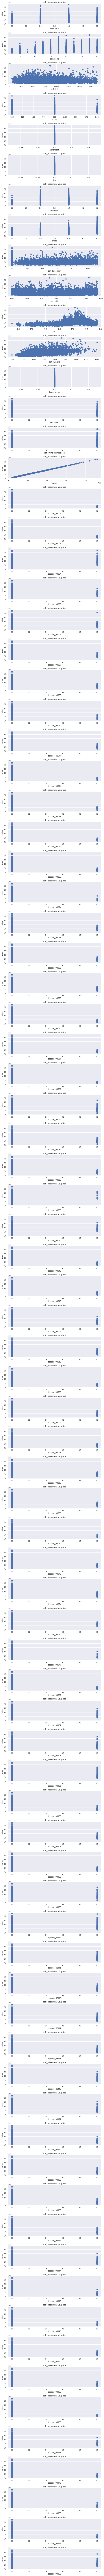

In [2353]:
def plot(df, target="price"):
    fig, ax = plt.subplots(nrows=len(df.columns), figsize=(8, 196))
    for i, cols in enumerate(df.columns):
        ax[i].scatter(df[cols], df[target])
        ax[i].set_xlabel(cols)
        ax[i].set_ylabel(target)
        ax[i].set_title(f"{col} vs. {target}")
    plt.tight_layout()
    return plt.show()

plot(modeling_df, target="price")
        

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     712.3
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:00:35   Log-Likelihood:            -2.0060e+05
No. Observations:               15577   AIC:                         4.014e+05
Df Residuals:                   15495   BIC:                         4.020e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               9.843e+05   2.33e+06      0.423      0.672   -3.57e+06    5.54e+06
bedrooms                1.481e+04   1258.234     11.774      0.000    1.23e+04    1.73e+04
bathrooms               3.254e+04   1984.533     16.397      0.000    2.86e+04    3.64e+04
sqft_lot                   3.7093      0.317     11.693      0.000       3.088       4.331
floors                  2847.8912   2340.926      1.217      0.224   -1740.598    7436.381
waterfront             -7.484e-06   7.66e-06     -0.977      0.328   -2.25e-05    7.52e-06
view                    6.684e-06   1.99e-05      0.337      0.736   -3.22e-05    4.56e-05
condition               2.141e+04   1375.081     15.567      0.000    1.87e+04    2.41e+04
grade                   6.312e+04   1471.021     42.910      0.000    6.02e+04     6.6e+04
sqft_basement             -8.0366      3.011     -2.669      0.008     -13.938      -2.135
yr_built                -727.9687     48.429    -15.032      0.000    -822.895    -633.042
lat                    -3334.9566   4.91e+04     -0.068      0.946   -9.96e+04     9.3e+04
sqft_living15             99.3922      2.269     43.796      0.000      94.944     103.841
large_home             -5.917e-08   7.33e-08     -0.807      0.420   -2.03e-07    8.46e-08
renovated               3.557e+04   4978.058      7.145      0.000    2.58e+04    4.53e+04
sqft_living_comparison  4.515e+04   1833.852     24.620      0.000    4.16e+04    4.87e+04
zipcode_98002           2.498e+04   9193.104      2.718      0.007    6963.433     4.3e+04
zipcode_98003           3169.8624   8443.993      0.375      0.707   -1.34e+04    1.97e+04
zipcode_98004           5.872e+05   1.77e+04     33.086      0.000    5.52e+05    6.22e+05
zipcode_98005           3.164e+05   1.82e+04     17.420      0.000    2.81e+05    3.52e+05
zipcode_98006           2.459e+05   1.48e+04     16.662      0.000    2.17e+05    2.75e+05
zipcode_98007           2.309e+05   1.83e+04     12.635      0.000    1.95e+05    2.67e+05
zipcode_98008           2.296e+05   1.74e+04     13.194      0.000    1.95e+05    2.64e+05
zipcode_98010           8.024e+04   1.63e+04      4.937      0.000    4.84e+04    1.12e+05
zipcode_98011           1.496e+05   2.37e+04      6.304      0.000    1.03e+05    1.96e+05
zipcode_98014           1.074e+05   2.42e+04      4.443      0.000       6e+04    1.55e+05
zipcode_98019           9.612e+04   2.32e+04      4.151      0.000    5.07e+04    1.42e+05
zipcode_98022           1.851e+04   1.15e+04      1.603      0.109   -4124.236    4.11e+04
zipcode_98023          -1.463e+04   7290.419     -2.006      0.045   -2.89e+04    -336.174
zipcode_98024           1.344e+05   2.36e+04      5.701      0.000    8.82e+04    1.81e+05
zipcode_98027           2.283e+05   1.43e+04     15.996      0.000       2e+05  

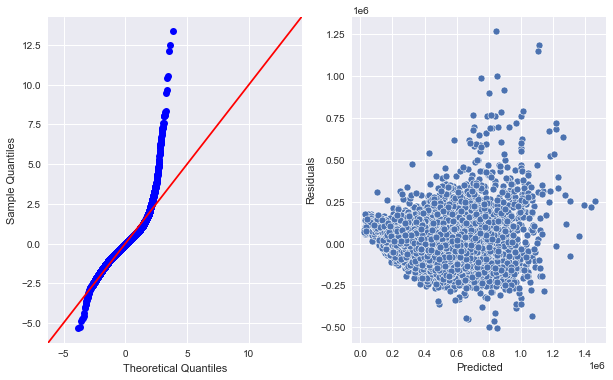

In [2354]:
model = modeling(modeling_df)

In [2355]:
model.pvalues[model.pvalues > 0.05]

Intercept        0.672175
floors           0.223788
waterfront       0.328338
view             0.736489
lat              0.945880
large_home       0.419798
zipcode_98003    0.707369
zipcode_98022    0.108976
zipcode_98030    0.389608
zipcode_98031    0.178293
zipcode_98032    0.934481
dtype: float64

from p values, we can see floors and lat are insignificant, hence we can get rid of them.

In [2356]:
modeling_df.drop(["floors", "lat"], axis=1, inplace=True)

In [2357]:
modeling_df

,bedrooms,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,5650,0,0,3,7,0.0,1955,1340,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,7242,0,0,3,7,400.0,1951,1690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,10000,0,0,3,6,0.0,1933,2720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,5000,0,0,5,7,910.0,1965,1360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,8080,0,0,3,8,0.0,1987,1800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,0,0,3,8,0.0,2009,1530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,4,2.50,5813,0,0,3,8,0.0,2014,1830,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,2,0.75,1350,0,0,3,7,0.0,2009,1020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,3,2.50,2388,0,0,3,8,0.0,2004,1410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     730.4
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:00:36   Log-Likelihood:            -2.0060e+05
No. Observations:               15577   AIC:                         4.014e+05
Df Residuals:                   15497   BIC:                         4.020e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               7.849e+05   8.84e+04      8.883      0.000    6.12e+05    9.58e+05
bedrooms                1.481e+04   1258.196     11.770      0.000    1.23e+04    1.73e+04
bathrooms               3.321e+04   1905.959     17.426      0.000    2.95e+04    3.69e+04
sqft_lot                   3.6268      0.310     11.703      0.000       3.019       4.234
waterfront              2.621e-07    3.7e-08      7.079      0.000    1.89e-07    3.35e-07
view                    2.537e-06   2.87e-07      8.838      0.000    1.97e-06     3.1e-06
condition               2.134e+04   1373.865     15.535      0.000    1.87e+04     2.4e+04
grade                    6.33e+04   1463.093     43.266      0.000    6.04e+04    6.62e+04
sqft_basement             -9.5719      2.735     -3.500      0.000     -14.932      -4.211
yr_built                -705.9174     44.912    -15.718      0.000    -793.951    -617.884
sqft_living15             99.5870      2.264     43.995      0.000      95.150     104.024
large_home              5.419e-10   1.16e-10      4.671      0.000    3.15e-10    7.69e-10
renovated               3.597e+04   4967.115      7.241      0.000    2.62e+04    4.57e+04
sqft_living_comparison  4.545e+04   1817.529     25.005      0.000    4.19e+04     4.9e+04
zipcode_98002           2.498e+04   9192.929      2.717      0.007    6958.849     4.3e+04
zipcode_98003           3021.3100   8442.374      0.358      0.720   -1.35e+04    1.96e+04
zipcode_98004           5.864e+05   9635.503     60.862      0.000    5.68e+05    6.05e+05
zipcode_98005           3.151e+05   1.12e+04     28.100      0.000    2.93e+05    3.37e+05
zipcode_98006           2.452e+05   8351.671     29.361      0.000    2.29e+05    2.62e+05
zipcode_98007             2.3e+05   1.09e+04     21.112      0.000    2.09e+05    2.51e+05
zipcode_98008           2.283e+05   8757.835     26.066      0.000    2.11e+05    2.45e+05
zipcode_98010           8.043e+04   1.62e+04      4.953      0.000    4.86e+04    1.12e+05
zipcode_98011           1.481e+05   9377.527     15.791      0.000     1.3e+05    1.66e+05
zipcode_98014           1.063e+05   1.61e+04      6.611      0.000    7.48e+04    1.38e+05
zipcode_98019           9.498e+04   9977.770      9.519      0.000    7.54e+04    1.15e+05
zipcode_98022           1.868e+04   1.03e+04      1.822      0.069   -1420.891    3.88e+04
zipcode_98023          -1.481e+04   7286.076     -2.033      0.042   -2.91e+04    -527.808
zipcode_98024            1.34e+05   2.02e+04      6.624      0.000    9.43e+04    1.74e+05
zipcode_98027           2.277e+05   8824.405     25.807      0.000     2.1e+05    2.45e+05
zipcode_98028           1.263e+05   8545.578     14.774      0.000     1.1e+05    1.43e+05
zipcode_98029           2.278e+05   8216.813     27.721      0.000    2.12e+05  

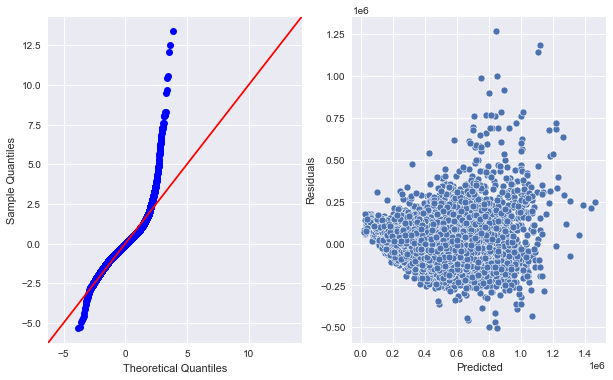

In [2358]:
model = modeling(modeling_df)

In [2359]:
modeling_df.drop(["large_home","renovated"], axis=1, inplace=True)

dropping large_home and renovated from the dataset since they are insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     736.6
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:00:37   Log-Likelihood:            -2.0062e+05
No. Observations:               15577   AIC:                         4.014e+05
Df Residuals:                   15498   BIC:                         4.020e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               9.542e+05   8.53e+04     11.181      0.000    7.87e+05    1.12e+06
bedrooms                1.455e+04   1259.769     11.549      0.000    1.21e+04     1.7e+04
bathrooms               3.521e+04   1889.064     18.638      0.000    3.15e+04    3.89e+04
sqft_lot                   3.5950      0.310     11.582      0.000       2.987       4.203
waterfront              -1.15e-06   1.23e-07     -9.372      0.000   -1.39e-06   -9.09e-07
view                   -4.965e-06   4.42e-07    -11.228      0.000   -5.83e-06    -4.1e-06
condition               1.972e+04   1357.719     14.525      0.000    1.71e+04    2.24e+04
grade                   6.397e+04   1462.589     43.738      0.000    6.11e+04    6.68e+04
sqft_basement             -9.9591      2.739     -3.636      0.000     -15.327      -4.591
yr_built                -791.2873     43.409    -18.229      0.000    -876.374    -706.201
sqft_living15             98.5158      2.263     43.543      0.000      94.081     102.951
sqft_living_comparison  4.563e+04   1820.371     25.065      0.000    4.21e+04    4.92e+04
zipcode_98002           2.516e+04   9208.133      2.733      0.006    7113.701    4.32e+04
zipcode_98003           2288.6292   8455.762      0.271      0.787   -1.43e+04    1.89e+04
zipcode_98004            5.88e+05   9649.095     60.936      0.000    5.69e+05    6.07e+05
zipcode_98005           3.148e+05   1.12e+04     28.030      0.000    2.93e+05    3.37e+05
zipcode_98006           2.453e+05   8365.506     29.324      0.000    2.29e+05    2.62e+05
zipcode_98007           2.296e+05   1.09e+04     21.039      0.000    2.08e+05    2.51e+05
zipcode_98008           2.277e+05   8771.974     25.957      0.000     2.1e+05    2.45e+05
zipcode_98010           8.319e+04   1.63e+04      5.116      0.000    5.13e+04    1.15e+05
zipcode_98011           1.481e+05   9393.072     15.762      0.000     1.3e+05    1.66e+05
zipcode_98014           1.068e+05   1.61e+04      6.630      0.000    7.52e+04    1.38e+05
zipcode_98019           9.535e+04   9994.180      9.541      0.000    7.58e+04    1.15e+05
zipcode_98022           2.121e+04   1.03e+04      2.066      0.039    1085.944    4.13e+04
zipcode_98023          -1.527e+04   7297.881     -2.092      0.036   -2.96e+04    -961.173
zipcode_98024           1.347e+05   2.03e+04      6.649      0.000     9.5e+04    1.74e+05
zipcode_98027            2.27e+05   8838.473     25.685      0.000     2.1e+05    2.44e+05
zipcode_98028           1.256e+05   8559.199     14.669      0.000    1.09e+05    1.42e+05
zipcode_98029           2.268e+05   8229.356     27.561      0.000    2.11e+05    2.43e+05
zipcode_98030           6792.6076   8460.215      0.803      0.422   -9790.403    2.34e+04
zipcode_98031           1.209e+04   8340.605      1.450      0.147   -4255.955  

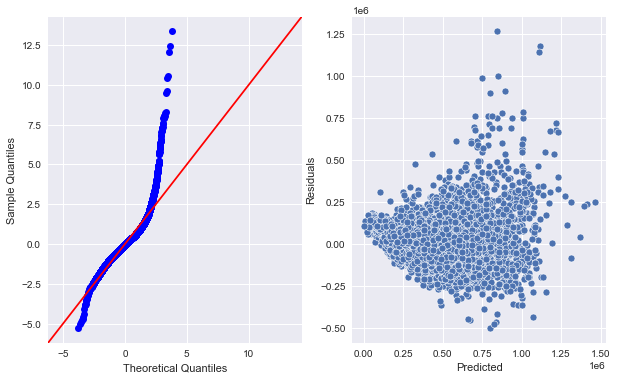

In [2360]:
model = modeling(modeling_df)

In [2361]:
modeling_df

,bedrooms,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,5650,0,0,3,7,0.0,1955,1340,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,7242,0,0,3,7,400.0,1951,1690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,10000,0,0,3,6,0.0,1933,2720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,5000,0,0,5,7,910.0,1965,1360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,8080,0,0,3,8,0.0,1987,1800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,0,0,3,8,0.0,2009,1530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,4,2.50,5813,0,0,3,8,0.0,2014,1830,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,2,0.75,1350,0,0,3,7,0.0,2009,1020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,3,2.50,2388,0,0,3,8,0.0,2004,1410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Outliers based on price

In [2362]:
outliers_price = modeling_df[find_outliers(modeling_df["price"]) == False]
outliers_price

,bedrooms,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,5650,0,0,3,7,0.0,1955,1340,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,7242,0,0,3,7,400.0,1951,1690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,10000,0,0,3,6,0.0,1933,2720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,5000,0,0,5,7,910.0,1965,1360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,8080,0,0,3,8,0.0,1987,1800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,0,0,3,8,0.0,2009,1530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,4,2.50,5813,0,0,3,8,0.0,2014,1830,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,2,0.75,1350,0,0,3,7,0.0,2009,1020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,3,2.50,2388,0,0,3,8,0.0,2004,1410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     788.5
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:00:38   Log-Likelihood:            -1.9215e+05
No. Observations:               15188   AIC:                         3.845e+05
Df Residuals:                   15109   BIC:                         3.851e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               8.929e+05   6.99e+04     12.766      0.000    7.56e+05    1.03e+06
bedrooms                1.275e+04   1020.226     12.496      0.000    1.07e+04    1.47e+04
bathrooms               2.787e+04   1534.837     18.155      0.000    2.49e+04    3.09e+04
sqft_lot                   2.0475      0.251      8.162      0.000       1.556       2.539
waterfront              -1.72e-08    1.8e-07     -0.096      0.924   -3.69e-07    3.35e-07
view                   -4.402e-06   3.13e-07    -14.080      0.000   -5.01e-06   -3.79e-06
condition                1.85e+04   1102.043     16.784      0.000    1.63e+04    2.07e+04
grade                   5.351e+04   1191.248     44.922      0.000    5.12e+04    5.58e+04
sqft_basement             -8.1299      2.225     -3.655      0.000     -12.490      -3.769
yr_built                -695.9316     35.629    -19.533      0.000    -765.768    -626.095
sqft_living15             92.4610      1.864     49.595      0.000      88.807      96.115
sqft_living_comparison  4.121e+04   1467.740     28.079      0.000    3.83e+04    4.41e+04
zipcode_98002           1.601e+04   7332.383      2.184      0.029    1638.122    3.04e+04
zipcode_98003           1833.1869   6731.659      0.272      0.785   -1.14e+04     1.5e+04
zipcode_98004           4.641e+05   9218.460     50.348      0.000    4.46e+05    4.82e+05
zipcode_98005           3.075e+05   9194.194     33.450      0.000     2.9e+05    3.26e+05
zipcode_98006           2.459e+05   6722.069     36.578      0.000    2.33e+05    2.59e+05
zipcode_98007           2.354e+05   8687.811     27.091      0.000    2.18e+05    2.52e+05
zipcode_98008           2.296e+05   6985.568     32.864      0.000    2.16e+05    2.43e+05
zipcode_98010           7.885e+04   1.29e+04      6.091      0.000    5.35e+04    1.04e+05
zipcode_98011           1.546e+05   7479.117     20.666      0.000     1.4e+05    1.69e+05
zipcode_98014            1.03e+05   1.28e+04      8.033      0.000    7.79e+04    1.28e+05
zipcode_98019            1.01e+05   7957.158     12.690      0.000    8.54e+04    1.17e+05
zipcode_98022           1.629e+04   8172.742      1.993      0.046     269.271    3.23e+04
zipcode_98023          -1.436e+04   5810.133     -2.471      0.013   -2.57e+04   -2967.177
zipcode_98024           1.344e+05   1.61e+04      8.332      0.000    1.03e+05    1.66e+05
zipcode_98027           2.303e+05   7037.564     32.719      0.000    2.16e+05    2.44e+05
zipcode_98028           1.305e+05   6814.714     19.152      0.000    1.17e+05    1.44e+05
zipcode_98029           2.332e+05   6554.570     35.578      0.000     2.2e+05    2.46e+05
zipcode_98030           8167.1900   6734.973      1.213      0.225   -5034.173    2.14e+04
zipcode_98031           1.264e+04   6640.051      1.903      0.057    -379.395  

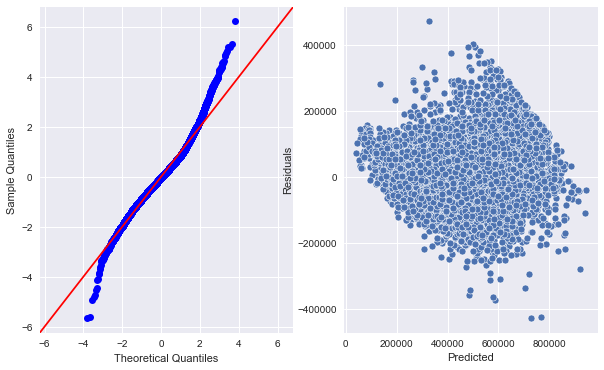

In [2363]:
modeling(outliers_price)

In [2364]:
outliers_price.drop("waterfront", axis=1, inplace=True)

C:\Users\Vinayak Modgil\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Scaling

In [2365]:
outliers_price[numeric_cols]

,bedrooms,bathrooms,sqft_lot,view,condition,grade,sqft_basement
0,3,1.00,5650,0,3,7,0.0
1,3,2.25,7242,0,3,7,400.0
2,2,1.00,10000,0,3,6,0.0
3,4,3.00,5000,0,5,7,910.0
4,3,2.00,8080,0,3,8,0.0
...,...,...,...,...,...,...,...
21592,3,2.50,1131,0,3,8,0.0
21593,4,2.50,5813,0,3,8,0.0
21594,2,0.75,1350,0,3,7,0.0
21595,3,2.50,2388,0,3,8,0.0


In [2378]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
outliers_price[numeric_cols] = scaler.fit_transform(outliers_price[numeric_cols])

<ipython-input-2378-2ceb2cd3648c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_price[numeric_cols] = scaler.fit_transform(outliers_price[numeric_cols])
C:\Users\Vinayak Modgil\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [2379]:
df_scaled = outliers_price
df_scaled

,bedrooms,bathrooms,sqft_lot,view,condition,grade,sqft_basement,yr_built,sqft_living15,sqft_living_comparison,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.316770,-1.486403,-0.406521,0.0,-0.630995,-0.451404,-0.625817,1955,1340,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.316770,0.446297,0.060973,0.0,-0.630995,-0.451404,0.624905,1951,1690,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.628412,-1.486403,0.870865,0.0,-0.630995,-1.699750,-0.625817,1933,2720,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.994872,1.605917,-0.597395,0.0,2.507553,-0.451404,2.219576,1965,1360,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.316770,0.059757,0.307053,0.0,-0.630995,0.796943,-0.625817,1987,1800,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.316770,0.832837,-1.733535,0.0,-0.630995,0.796943,-0.625817,2009,1530,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,0.994872,0.832837,-0.358656,0.0,-0.630995,0.796943,-0.625817,2014,1830,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,-1.628412,-1.872943,-1.669225,0.0,-0.630995,-0.451404,-0.625817,2009,1020,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,-0.316770,0.832837,-1.364415,0.0,-0.630995,0.796943,-0.625817,2004,1410,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     788.5
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:00:39   Log-Likelihood:            -1.9215e+05
No. Observations:               15188   AIC:                         3.845e+05
Df Residuals:                   15109   BIC:                         3.851e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.459e+06   7.15e+04     20.407      0.000    1.32e+06     1.6e+06
bedrooms                9719.3245    777.823     12.496      0.000    8194.697    1.12e+04
bathrooms               1.802e+04    992.677     18.155      0.000    1.61e+04       2e+04
sqft_lot                6972.4508    854.270      8.162      0.000    5297.978    8646.924
view                    4.019e-07   2.13e-08     18.907      0.000     3.6e-07    4.44e-07
condition               1.179e+04    702.263     16.784      0.000    1.04e+04    1.32e+04
grade                   4.287e+04    954.261     44.922      0.000     4.1e+04    4.47e+04
sqft_basement          -2600.0735    711.470     -3.655      0.000   -3994.640   -1205.507
yr_built                -695.9316     35.629    -19.533      0.000    -765.768    -626.095
sqft_living15             92.4610      1.864     49.595      0.000      88.807      96.115
sqft_living_comparison  4.121e+04   1467.740     28.079      0.000    3.83e+04    4.41e+04
zipcode_98002           1.601e+04   7332.383      2.184      0.029    1638.122    3.04e+04
zipcode_98003           1833.1869   6731.659      0.272      0.785   -1.14e+04     1.5e+04
zipcode_98004           4.641e+05   9218.460     50.348      0.000    4.46e+05    4.82e+05
zipcode_98005           3.075e+05   9194.194     33.450      0.000     2.9e+05    3.26e+05
zipcode_98006           2.459e+05   6722.069     36.578      0.000    2.33e+05    2.59e+05
zipcode_98007           2.354e+05   8687.811     27.091      0.000    2.18e+05    2.52e+05
zipcode_98008           2.296e+05   6985.568     32.864      0.000    2.16e+05    2.43e+05
zipcode_98010           7.885e+04   1.29e+04      6.091      0.000    5.35e+04    1.04e+05
zipcode_98011           1.546e+05   7479.117     20.666      0.000     1.4e+05    1.69e+05
zipcode_98014            1.03e+05   1.28e+04      8.033      0.000    7.79e+04    1.28e+05
zipcode_98019            1.01e+05   7957.158     12.690      0.000    8.54e+04    1.17e+05
zipcode_98022           1.629e+04   8172.742      1.993      0.046     269.271    3.23e+04
zipcode_98023          -1.436e+04   5810.133     -2.471      0.013   -2.57e+04   -2967.177
zipcode_98024           1.344e+05   1.61e+04      8.332      0.000    1.03e+05    1.66e+05
zipcode_98027           2.303e+05   7037.564     32.719      0.000    2.16e+05    2.44e+05
zipcode_98028           1.305e+05   6814.714     19.152      0.000    1.17e+05    1.44e+05
zipcode_98029           2.332e+05   6554.570     35.578      0.000     2.2e+05    2.46e+05
zipcode_98030           8167.1900   6734.973      1.213      0.225   -5034.173    2.14e+04
zipcode_98031           1.264e+04   6640.051      1.903      0.057    -379.395    2.57e+04
zipcode_98032          -4577.3221   8831.190     -0.518      0.604   -2.19e+04  

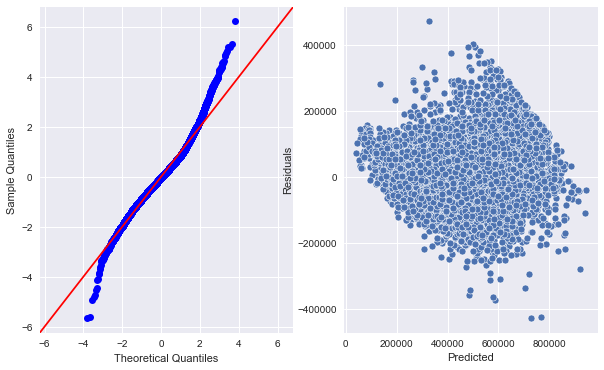

In [2368]:
model = modeling(df_scaled)

## Interpret

Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

In [2369]:
coefficients = model.params.sort_values().to_frame('coefficients')
coefficients['abs'] = coefficients['coefficients'].abs()
coefficients.sort_values('abs', ascending=False, inplace=True)

In [2370]:
coefficients[~coefficients.index.str.startswith('zipcode')]

,coefficients,abs
Intercept,1.458543e+06,1.458543e+06
grade,4.286696e+04,4.286696e+04
sqft_living_comparison,4.121305e+04,4.121305e+04
bathrooms,1.802219e+04,1.802219e+04
condition,1.178683e+04,1.178683e+04
bedrooms,9.719324e+03,9.719324e+03
sqft_lot,6.972451e+03,6.972451e+03
sqft_basement,-2.600074e+03,2.600074e+03
yr_built,-6.959316e+02,6.959316e+02
sqft_living15,9.246096e+01,9.246096e+01


### Data Visualization

We see that the top 3 parameters that affect the sale price of homes are grade, sqft_living_comparison and yr_built.
We shall draw conclusions from the these three parameters.

In [2457]:
final_df = modeling_df.loc[:, ["grade", "sqft_living_comparison", "bathrooms", "price"]]
grade_groupby = final_df.groupby("grade").mean().reset_index()
final_df

,grade,sqft_living_comparison,bathrooms,price
0,7,0,1.00,221900.0
1,7,1,2.25,538000.0
2,6,0,1.00,180000.0
3,7,1,3.00,604000.0
4,8,0,2.00,510000.0
...,...,...,...,...
21592,8,0,2.50,360000.0
21593,8,1,2.50,400000.0
21594,7,0,0.75,402101.0
21595,8,1,2.50,400000.0


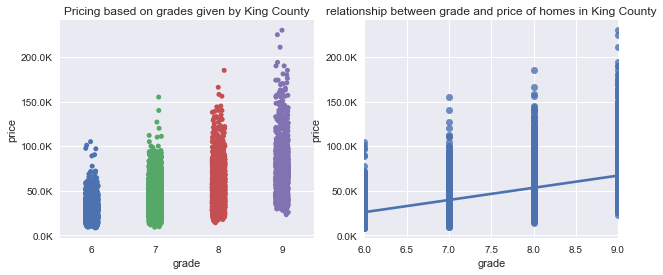

In [2456]:
fig, ax = plt.subplots(figsize=(10, 4), ncols=2)
fig.gca()
sns.stripplot(x="grade", y="price", data=final_df, ax=ax[0])
sns.regplot(x="grade", y="price", data=final_df, ax=ax[1])
ax[0].yaxis.set_major_formatter(FuncFormatter(thousands))
ax[0].set_title("Pricing based on grades given by King County")
ax[1].yaxis.set_major_formatter(FuncFormatter(thousands))
ax[1].set_title("relationship between grade and price of homes in King County")
plt.show()

In [2403]:
def grade_types(grade):
    if grade < 7:
        return "Low Score"
    elif grade > 8:
        return "High Score"
    else:
        return "Average Score"

In [2421]:
df_grade["grade_score"] = df_grade["grade"].map(lambda x: grade_types(x))

In [2426]:
mean_price_per_score = df_grade.groupby("grade_score")["price"].mean().reset_index()

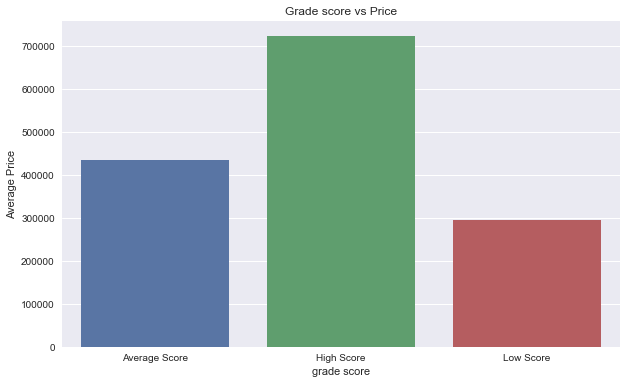

In [2450]:
with plt.style.context("seaborn-darkgrid"):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x="grade_score", y="price", data=mean_price_per_score)
    ax.set_ylabel("Average Price")
    ax.set_xlabel("grade score")
    ax.set_title("Grade score vs Price")
    plt.show()

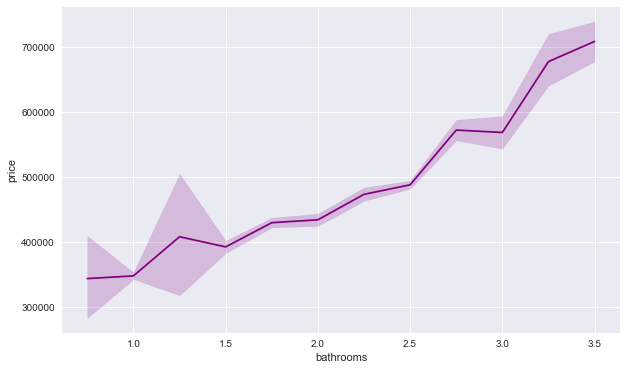

In [2454]:
with plt.style.context("seaborn-darkgrid"):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(x="bathrooms", y="price", data=final_df, color="purple")

## Conclusion and Recommendation

Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***